# Week 2 - Thursday: Color Conversion & Transforms

## Block 1: Implementing Color Conversions

In this block, we will:
1. Implement RGB to HSV conversion from scratch.
2. Implement HSV to RGB conversion from scratch.
3. Demonstrate RGB to CIELAB (L\*a\*b\*) and CIELAB to RGB conversions using OpenCV.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Helper function to display color swatches
def display_color_swatches(colors: dict, title="Color Swatches"):
    n_colors = len(colors)
    fig, axs = plt.subplots(1, n_colors, figsize=(n_colors * 2, 2))
    if n_colors == 1:  # Matplotlib returns a single Axes object if only one subplot
        axs = [axs]
    fig.suptitle(title, fontsize=14)
    for i, (name, color_rgb_normalized) in enumerate(colors.items()):
        # Ensure color is in [0,1] for matplotlib display and handle potential single pixel array
        swatch = np.clip(color_rgb_normalized, 0, 1).reshape(1, 1, 3)
        axs[i].imshow(swatch)
        axs[i].set_title(f"{name}\n{np.round(color_rgb_normalized*255).astype(int)}")
        axs[i].axis("off")
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


print("Setup complete. Helper function defined.")

Setup complete. Helper function defined.


### 1. RGB to HSV Conversion (from Scratch)

We'll implement the conversion formulas discussed in the theory.
Input RGB values are assumed to be normalized to the range `[0, 1]`.
Output HSV will have H in `[0, 360)` degrees, S in `[0, 1]`, V in `[0, 1]`.

In [4]:
def rgb_to_hsv_scratch(r, g, b):
    """Converts RGB (normalized 0-1) to HSV (H:0-360, S:0-1, V:0-1)."""
    max_val = max(r, g, b)
    min_val = min(r, g, b)
    v = max_val
    delta = max_val - min_val  # Chroma
    if delta == 0:  # Achromatic (gray)
        h = 0
        s = 0
    else:
        s = delta / max_val
        if r == max_val:
            h_prime = (g - b) / delta
        elif g == max_val:
            h_prime = 2 + (b - r) / delta
        else:
            h_prime = 4 + (r - g) / delta
        h = h_prime * 60
        if h < 0:
            h += 360
    return h, s, v

--- Testing RGB to HSV (Scratch) ---
Red RGB: [255.   0.   0.] -> HSV: (H=0.00°, S=1.00, V=1.00)
Green RGB: [  0. 255.   0.] -> HSV: (H=120.00°, S=1.00, V=1.00)
Blue RGB: [  0.   0. 255.] -> HSV: (H=240.00°, S=1.00, V=1.00)
Yellow RGB: [255. 255.   0.] -> HSV: (H=60.00°, S=1.00, V=1.00)
Cyan RGB: [  0. 255. 255.] -> HSV: (H=180.00°, S=1.00, V=1.00)
Magenta RGB: [255.   0. 255.] -> HSV: (H=300.00°, S=1.00, V=1.00)
White RGB: [255. 255. 255.] -> HSV: (H=0.00°, S=0.00, V=1.00)
Black RGB: [0. 0. 0.] -> HSV: (H=0.00°, S=0.00, V=0.00)
Gray RGB: [127.5 127.5 127.5] -> HSV: (H=0.00°, S=0.00, V=0.50)
Orange RGB: [255.  127.5   0. ] -> HSV: (H=30.00°, S=1.00, V=1.00)


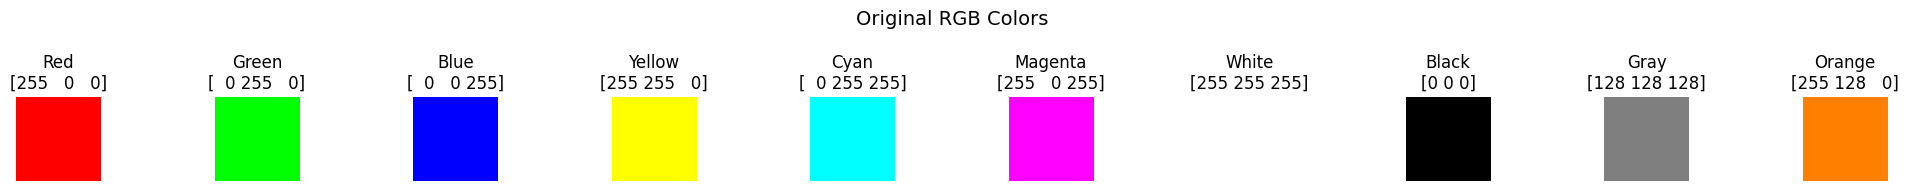

In [7]:
# Test cases
colors_rgb_normalized = {
    "Red": np.array([1.0, 0.0, 0.0]),
    "Green": np.array([0.0, 1.0, 0.0]),
    "Blue": np.array([0.0, 0.0, 1.0]),
    "Yellow": np.array([1.0, 1.0, 0.0]),
    "Cyan": np.array([0.0, 1.0, 1.0]),
    "Magenta": np.array([1.0, 0.0, 1.0]),
    "White": np.array([1.0, 1.0, 1.0]),
    "Black": np.array([0.0, 0.0, 0.0]),
    "Gray": np.array([0.5, 0.5, 0.5]),
    "Orange": np.array([1.0, 0.5, 0.0]) # R=255, G=127, B=0
}

print("--- Testing RGB to HSV (Scratch) ---")
results_hsv = {}
for name, rgb_norm in colors_rgb_normalized.items():
    h, s, v = rgb_to_hsv_scratch(rgb_norm[0], rgb_norm[1], rgb_norm[2])
    results_hsv[name] = (h, s, v)
    print(f"{name} RGB: {rgb_norm*255} -> HSV: (H={h:.2f}°, S={s:.2f}, V={v:.2f})")

display_color_swatches(colors_rgb_normalized, "Original RGB Colors")

### 2. HSV to RGB Conversion (from Scratch)

Now, we implement the reverse conversion.
Input HSV: H in `[0, 360)`, S in `[0, 1]`, V in `[0, 1]`.
Output RGB values are normalized to `[0, 1]`.

In [8]:
def hsv_to_rgb_scratch(h, s, v):
    """Converts HSV (H:0-360, S:0-1, V:0-1) to RGB (normalized 0-1)."""
    if s == 0: # Achromatic (gray)
        return v, v, v
        
    h_i = int(h / 60) % 6
    f = (h / 60) - h_i
    
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)
    
    if h_i == 0:
        r, g, b = v, t, p
    elif h_i == 1:
        r, g, b = q, v, p
    elif h_i == 2:
        r, g, b = p, v, t
    elif h_i == 3:
        r, g, b = p, q, v
    elif h_i == 4:
        r, g, b = t, p, v
    else: # h_i == 5
        r, g, b = v, p, q
        
    return r, g, b


--- Testing HSV to RGB (Scratch) ---
Red HSV: (H=0.00°, S=1.00, V=1.00) -> RGB: [255, 0, 0]
Green HSV: (H=120.00°, S=1.00, V=1.00) -> RGB: [0, 255, 0]
Blue HSV: (H=240.00°, S=1.00, V=1.00) -> RGB: [0, 0, 255]
Yellow HSV: (H=60.00°, S=1.00, V=1.00) -> RGB: [255, 255, 0]
Cyan HSV: (H=180.00°, S=1.00, V=1.00) -> RGB: [0, 255, 255]
Magenta HSV: (H=300.00°, S=1.00, V=1.00) -> RGB: [255, 0, 255]
White HSV: (H=0.00°, S=0.00, V=1.00) -> RGB: [255, 255, 255]
Black HSV: (H=0.00°, S=0.00, V=0.00) -> RGB: [0, 0, 0]
Gray HSV: (H=0.00°, S=0.00, V=0.50) -> RGB: [128, 128, 128]
Orange HSV: (H=30.00°, S=1.00, V=1.00) -> RGB: [255, 128, 0]


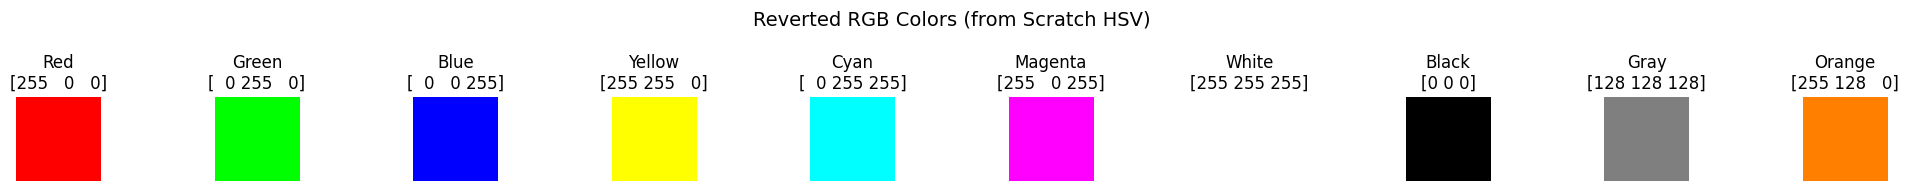

In [9]:
# Test the HSV to RGB conversion using the results from the previous step
print("\n--- Testing HSV to RGB (Scratch) ---")
reverted_rgb_colors = {}
for name, hsv_val in results_hsv.items():
    r, g, b = hsv_to_rgb_scratch(hsv_val[0], hsv_val[1], hsv_val[2])
    reverted_rgb_colors[name] = np.array([r,g,b])
    print(f"{name} HSV: (H={hsv_val[0]:.2f}°, S={hsv_val[1]:.2f}, V={hsv_val[2]:.2f}) -> RGB: {[round(x*255) for x in [r,g,b]]}")

display_color_swatches(reverted_rgb_colors, "Reverted RGB Colors (from Scratch HSV)")

In [10]:
# Compare with original (should be very close, minor float precision differences)
print("\nVerification (Original vs Reverted):")
for name in colors_rgb_normalized:
    original = colors_rgb_normalized[name]
    reverted = reverted_rgb_colors[name]
    diff = np.sum(np.abs(original - reverted))
    print(f"{name}: Difference = {diff:.4e}")
    if diff > 1e-6 : # Allow for small floating point inaccuracies
         print(f"  Original: {original*255}, Reverted: {reverted*255}")


Verification (Original vs Reverted):
Red: Difference = 0.0000e+00
Green: Difference = 0.0000e+00
Blue: Difference = 0.0000e+00
Yellow: Difference = 0.0000e+00
Cyan: Difference = 0.0000e+00
Magenta: Difference = 0.0000e+00
White: Difference = 0.0000e+00
Black: Difference = 0.0000e+00
Gray: Difference = 0.0000e+00
Orange: Difference = 0.0000e+00


### 3. RGB <=> CIELAB (L\*a\*b\*) Conversion using OpenCV

CIELAB conversion is more complex and often involves reference white points. OpenCV provides optimized functions for this.

- `cv2.cvtColor(image, cv2.COLOR_BGR2LAB)`
- `cv2.cvtColor(image, cv2.COLOR_LAB2BGR)`

Note: OpenCV typically works with BGR order for images. For single pixels, we need to be mindful of this.
L\* channel ranges from 0 to 100. a\* and b\* channels typically range from -128 to 127 (or represented as 0-255 with an offset if stored in 8-bit images). When OpenCV converts an 8-bit BGR image to LAB, L is scaled to `L*255/100`, and a,b are offset by 128.
When converting float32 BGR images (values in [0,1]), L is in [0,100], a and b are in approx [-127,127].



--- RGB <=> CIELAB (L*a*b*) using OpenCV ---
Original Orange (BGR_u8 for OpenCV): [  0 127 255]


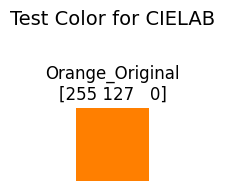

Orange OpenCV L*a*b* (from BGR uint8): L=171, a=171, b=202


In [11]:
print("\n--- RGB <=> CIELAB (L*a*b*) using OpenCV ---")
# Let's use one color for detailed demonstration: Orange
orange_rgb_u8 = np.array([[[0,127,255]]],dtype=np.uint8) # BGR for OpenCV: B=0, G=127, R=255
orange_rgb_norm_display = np.array([255,127,0])/255.0 # RGB for display
print(f"Original Orange (BGR_u8 for OpenCV): {orange_rgb_u8[0,0]}")
display_color_swatches({"Orange_Original": orange_rgb_norm_display}, "Test Color for CIELAB")

# RGB (actually BGR) to CIELAB
# For 8-bit images, OpenCV's L*a*b* output: L in [0,255], a,b in [0,255]

orange_lab_u8 = cv2.cvtColor(orange_rgb_u8, cv2.COLOR_BGR2LAB)
l_cv, a_cv, b_cv = orange_lab_u8[0,0]
print(f"Orange OpenCV L*a*b* (from BGR uint8): L={l_cv}, a={a_cv}, b={b_cv}")
# To get L* in [0,100], a*,b* in approx [-128,127]:
# L_star = l_cv * 100.0 / 255.0
# a_star = float(a_cv) - 128.0
# b_star = float(b_cv) - 128.0
# print(f"  Interpreted L*={L_star:.2f}, a*={a_star:.2f}, b*={b_star:.2f}")

Reverted Orange (BGR_u8 from OpenCV L*a*b*): [  0 128 255]


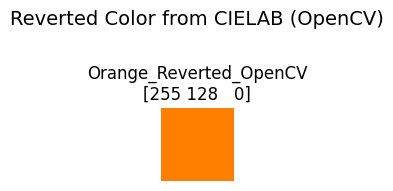


Orange OpenCV L*a*b* (from BGR float32): L*=66.86, a*=43.31, b*=73.89
Reverted Orange (BGR_f32 from L*a*b*): [5.2994464e-02 1.2700469e+02 2.5498853e+02]
Difference (float32 conversion): 2.7121e-04


In [12]:
# CIELAB to RGB (actually BGR)
reverted_bgr_u8 = cv2.cvtColor(orange_lab_u8, cv2.COLOR_Lab2BGR)
print(f"Reverted Orange (BGR_u8 from OpenCV L*a*b*): {reverted_bgr_u8[0,0]}")

reverted_rgb_norm_display = np.array([reverted_bgr_u8[0,0,2], reverted_bgr_u8[0,0,1], reverted_bgr_u8[0,0,0]])/255.0
display_color_swatches({"Orange_Reverted_OpenCV": reverted_rgb_norm_display}, "Reverted Color from CIELAB (OpenCV)")


# Let's try with float32 images (values 0-1) for more standard L*a*b* ranges
orange_bgr_f32 = np.array([[[0/255.0, 127/255.0, 255/255.0]]], dtype=np.float32)
orange_lab_f32 = cv2.cvtColor(orange_bgr_f32, cv2.COLOR_BGR2Lab)
l_f32, a_f32, b_f32 = orange_lab_f32[0,0]
print(f"\nOrange OpenCV L*a*b* (from BGR float32): L*={l_f32:.2f}, a*={a_f32:.2f}, b*={b_f32:.2f}")
# Here L* is directly in [0,100], a*,b* are in their characteristic range.

reverted_bgr_f32 = cv2.cvtColor(orange_lab_f32, cv2.COLOR_Lab2BGR)
print(f"Reverted Orange (BGR_f32 from L*a*b*): {reverted_bgr_f32[0,0]*255}") # Scale back to 0-255 for comparison
diff_float = np.sum(np.abs(orange_bgr_f32 - reverted_bgr_f32))
print(f"Difference (float32 conversion): {diff_float:.4e}")

**Summary of Block 1:**
- We have successfully implemented RGB <=> HSV conversion functions from scratch and verified them.
- We have demonstrated how to use OpenCV for RGB <=> CIELAB conversions, noting the different value ranges depending on input image data type (uint8 vs float32). For CIELAB, using float32 input (normalized BGR 0-1) to `cv2.cvtColor` gives L\*a\*b\* values in their standard perceptual ranges.

## Block 2: Applying Pixel-wise Color Transforms

In this block, we'll use the color conversions to perform image manipulations:
1. Increase image saturation by 20% using the HSV color space.
2. Adjust image brightness by shifting the L\* channel in CIELAB color space.

We'll need a sample image for these operations.

Test image './Marle.png' loaded successfully.


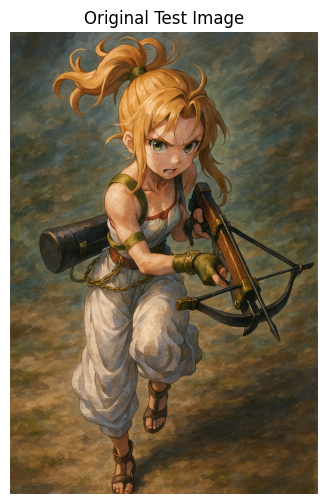

In [5]:
# --- Load a Test Image ---
TEST_IMAGE_PATH = './Marle.png' # Make sure you have this image


img_bgr_original = cv2.imread(TEST_IMAGE_PATH)

if img_bgr_original is None:
    print(f"Error: Could not load test image from '{TEST_IMAGE_PATH}'")
    # Stop execution if image is missing
    raise FileNotFoundError(f"Test image not found: {TEST_IMAGE_PATH}")
else:
    print(f"Test image '{TEST_IMAGE_PATH}' loaded successfully.")
    img_rgb_original_display = cv2.cvtColor(img_bgr_original, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb_original_display)
    plt.title("Original Test Image")
    plt.axis('off')
    plt.show()

In [6]:
# Helper function for side-by-side comparison
def display_before_after(img_before_bgr, img_after_bgr, title_before="Before", title_after="After", main_title=""):
    img_before_rgb = cv2.cvtColor(img_before_bgr, cv2.COLOR_BGR2RGB)
    img_after_rgb = cv2.cvtColor(img_after_bgr, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(main_title, fontsize=14)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_before_rgb)
    plt.title(title_before)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img_after_rgb)
    plt.title(title_after)
    plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### 1. Increase Saturation by 20% in HSV

Steps:
1. Convert BGR image to HSV.
2. Scale the Saturation (S) channel.
3. Clip S values to be within the valid range [0, 255] for uint8 HSV.
4. Convert back to BGR.


Increasing saturation by 20%...
Saturation increase complete.


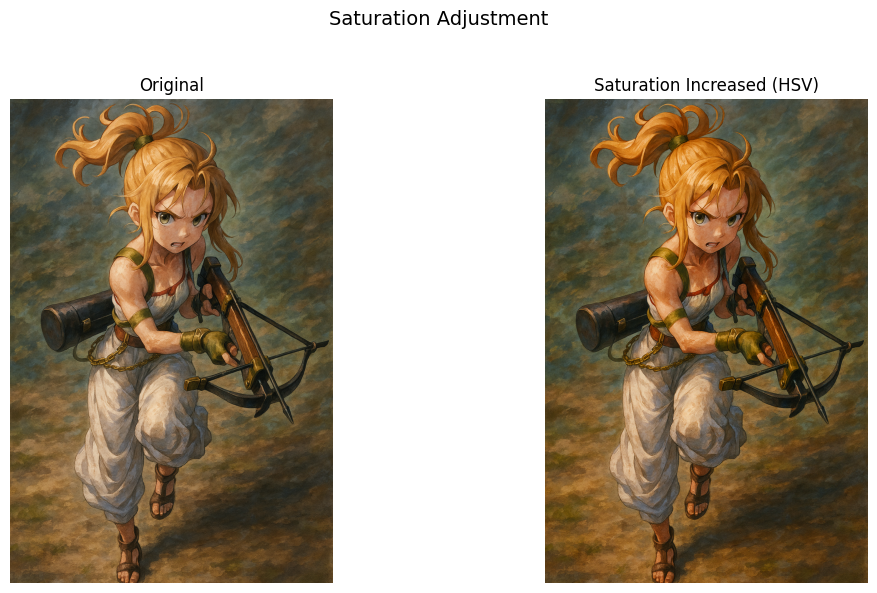

In [7]:
# --- Increase Saturation using HSV ---
print("Increasing saturation by 20%...")

# Convert BGR to HSV
# OpenCV's HSV for uint8: H=[0,179], S=[0,255], V=[0,255]
img_hsv = cv2.cvtColor(img_bgr_original, cv2.COLOR_BGR2HSV)

# Split channels
h, s, v = cv2.split(img_hsv)

# Increase saturation by 20%
# Need to be careful with data types to avoid overflow before clipping
s_increased = s.astype(np.float32) * 1.20

# Clip saturation to the valid range [0, 255]
s_increased = np.clip(s_increased, 0, 255).astype(np.uint8)

# Merge channels back
img_hsv_saturated = cv2.merge([h, s_increased, v])

# Convert back to BGR
img_bgr_saturated = cv2.cvtColor(img_hsv_saturated, cv2.COLOR_HSV2BGR)

print("Saturation increase complete.")
display_before_after(img_bgr_original, img_bgr_saturated, 
                     "Original", "Saturation Increased (HSV)", 
                     "Saturation Adjustment")


### 2. Adjust Brightness by Shifting L\* Channel in CIELAB

Steps:
1. Convert BGR image to CIELAB. For L\* adjustments, it's better to use float32 to work with L\* in [0,100].
2. Add an offset to the L\* channel.
3. Clip L\* values to be within the valid range [0, 100].
4. Convert back to BGR.


Adjusting L* channel by 20 units...
L* channel shift complete.


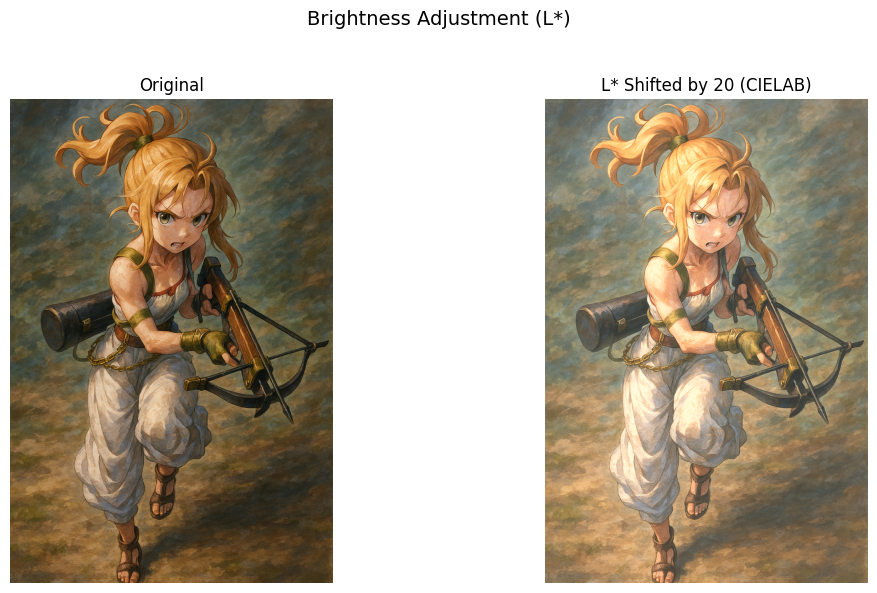

In [8]:
# --- Adjust Brightness using CIELAB L* channel ---
brightness_shift = 20 # Increase L* by 20 (makes it brighter)
# brightness_shift = -20 # Decrease L* by 20 (makes it darker)
print(f"Adjusting L* channel by {brightness_shift} units...")

# Convert original BGR (uint8) to BGR float32 (0-1 range) for LAB conversion
img_bgr_f32 = img_bgr_original.astype(np.float32) / 255.0

# Convert BGR (float32) to CIELAB (float32)
# L* will be in [0,100], a*b* in ~[-128,127]
img_lab_f32 = cv2.cvtColor(img_bgr_f32, cv2.COLOR_BGR2Lab)

# Split channels
l_star, a_star, b_star = cv2.split(img_lab_f32)

# Add shift to L* channel
l_star_shifted = l_star + brightness_shift

# Clip L* to the valid range [0, 100]
l_star_shifted = np.clip(l_star_shifted, 0, 100)

# Merge channels back
img_lab_brightened_f32 = cv2.merge([l_star_shifted, a_star, b_star])

# Convert back to BGR (float32)
img_bgr_brightened_f32 = cv2.cvtColor(img_lab_brightened_f32, cv2.COLOR_Lab2BGR)

# Convert BGR (float32) back to BGR (uint8 0-255) for display/saving
# Also clip to [0,1] before multiplying by 255 to avoid issues from minor float inaccuracies
img_bgr_brightened_u8 = (np.clip(img_bgr_brightened_f32, 0, 1) * 255).astype(np.uint8)


print("L* channel shift complete.")
display_before_after(img_bgr_original, img_bgr_brightened_u8,
                     "Original", f"L* Shifted by {brightness_shift} (CIELAB)",
                     "Brightness Adjustment (L*)")

**Summary of Block 2:**
- We have successfully applied pixel-wise transformations to a test image.
- Increasing saturation in HSV made the colors appear more vivid.
- Shifting the L\* channel in CIELAB adjusted the perceived brightness of the image while attempting to preserve color relationships better than a simple RGB brightness adjustment.
- These examples demonstrate the power of using different color spaces for intuitive image manipulations.